# Training a CNN on MNIST

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [3]:
# Fetch the MNIST data
(X_train, t_train), (X_test, t_test) = tf.keras.datasets.mnist.load_data()
print("Training data:", X_train.shape, t_train.shape)
print("Test data:", X_test.shape, t_test.shape)

# Normalize the values
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.

# Mean removal
X_mean = np.mean(X_train, axis=0)
X_train -= X_mean
X_test -= X_mean

# One-hot encoding
T_train = tf.keras.utils.to_categorical(t_train, 10)
T_test = tf.keras.utils.to_categorical(t_test, 10)

11501568/11490434 [==============================] - 0s 0us/step
Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


#The following code defines the basic network in keras:

In [4]:
# Delete all previous models to free memory
tf.keras.backend.clear_session()

# Sequential model
model = tf.keras.models.Sequential()

# Input layer representing the (28, 28) image
model.add(tf.keras.layers.Input(shape=(28, 28, 1)))

# Convolutional layer with 16 feature maps using 3x3 filters
model.add(tf.keras.layers.Conv2D(16, (3, 3), padding='valid'))
model.add(tf.keras.layers.Activation('relu')) 

# Max-pooling layerover 2x2 regions
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps into a vector
model.add(tf.keras.layers.Flatten())

# Fully-connected layer
model.add(tf.keras.layers.Dense(units=100))
model.add(tf.keras.layers.Activation('relu')) 

# Softmax output layer over 10 classes
model.add(tf.keras.layers.Dense(units=10))
model.add(tf.keras.layers.Activation('softmax')) 

# Learning rule
optimizer = tf.keras.optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

# Loss function
model.compile(
    loss='categorical_crossentropy', # loss function
    optimizer=optimizer, # learning rule
    metrics=['accuracy'] # show accuracy
)

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 activation (Activation)     (None, 26, 26, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense (Dense)               (None, 100)               270500    
                                                                 
 activation_1 (Activation)   (None, 100)               0         
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


#Let’s now train this network on MNIST for 10 epochs, using minibatches of 64 images:

In [5]:
# History tracks the evolution of the metrics during learning
history = tf.keras.callbacks.History()

# Training procedure
model.fit(
    X_train, T_train, # training data
    batch_size=64,  # batch size
    epochs=10, # Maximum number of epochs
    validation_split=0.1, # Perceptage of training data used for validation
    callbacks=[history] # Track the metrics at the end of each epoch
)

Epoch 1/10
844/844 [==============================] - 14s 4ms/step - loss: 0.1471 - accuracy: 0.9544 - val_loss: 0.0548 - val_accuracy: 0.9838
Epoch 2/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0503 - accuracy: 0.9840 - val_loss: 0.0523 - val_accuracy: 0.9853
Epoch 3/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0303 - accuracy: 0.9899 - val_loss: 0.0638 - val_accuracy: 0.9857
Epoch 4/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0211 - accuracy: 0.9931 - val_loss: 0.0771 - val_accuracy: 0.9848
Epoch 5/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0105 - accuracy: 0.9967 - val_loss: 0.0684 - val_accuracy: 0.9858
Epoch 6/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.0719 - val_accuracy: 0.9877
Epoch 7/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0078 - accuracy: 0.9974 - val_loss: 0.0635 - val_accuracy: 0.9862
Epoch

As in the previous exercise, the next cells compute the test loss and accuracy and display the evolution of the training and validation accuracies:

In [6]:
score = model.evaluate(X_test, T_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06695958971977234
Test accuracy: 0.9865000247955322


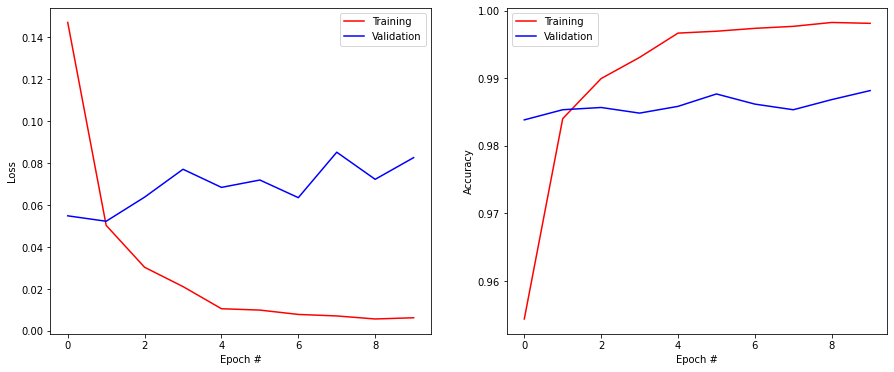

In [7]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.plot(history.history['loss'], '-r', label="Training")
plt.plot(history.history['val_loss'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], '-r', label="Training")
plt.plot(history.history['val_accuracy'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#Improve the CNN to avoid overfitting. 
 -The test accuracy should be around 99%.
 -You can:

 -change the learning rate

 -add another block on convolution + max-pooling before the  -fully-connected layer to reduce the number of parameters,

-add dropout after some of the layers,

 -use L2 regularization,

 -use a different optimizer,

 -do whatever you want.

In [8]:
# Delete all previous models to free memory
tf.keras.backend.clear_session()

# Sequential model
model = tf.keras.Sequential()

model.add(tf.keras.layers.Input((28, 28, 1)))

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='valid'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='valid'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(150, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Learning rule
optimizer = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Loss function
model.compile(
    loss='categorical_crossentropy', # loss
    optimizer=optimizer, # learning rule
    metrics=['accuracy'] # show accuracy
)

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [9]:
history = tf.keras.callbacks.History()

model.fit(
    X_train, T_train,
    batch_size=64, 
    epochs=20,
    validation_split=0.1,
    callbacks=[history]
)

Epoch 1/20
844/844 [==============================] - 5s 5ms/step - loss: 0.5739 - accuracy: 0.8123 - val_loss: 0.0896 - val_accuracy: 0.9753
Epoch 2/20
844/844 [==============================] - 3s 4ms/step - loss: 0.1982 - accuracy: 0.9398 - val_loss: 0.0634 - val_accuracy: 0.9818
Epoch 3/20
844/844 [==============================] - 3s 4ms/step - loss: 0.1522 - accuracy: 0.9524 - val_loss: 0.0538 - val_accuracy: 0.9838
Epoch 4/20
844/844 [==============================] - 4s 4ms/step - loss: 0.1319 - accuracy: 0.9596 - val_loss: 0.0482 - val_accuracy: 0.9865
Epoch 5/20
844/844 [==============================] - 3s 4ms/step - loss: 0.1193 - accuracy: 0.9634 - val_loss: 0.0427 - val_accuracy: 0.9870
Epoch 6/20
844/844 [==============================] - 3s 4ms/step - loss: 0.1094 - accuracy: 0.9662 - val_loss: 0.0409 - val_accuracy: 0.9875
Epoch 7/20
844/844 [==============================] - 3s 4ms/step - loss: 0.0979 - accuracy: 0.9694 - val_loss: 0.0380 - val_accuracy: 0.9892
Epoch 

In [10]:
score = model.evaluate(X_test, T_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.022000115364789963
Test accuracy: 0.9929999709129333


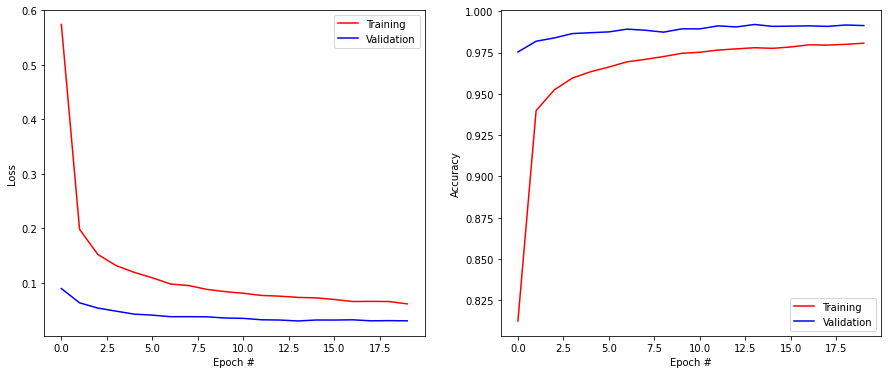

In [11]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.plot(history.history['loss'], '-r', label="Training")
plt.plot(history.history['val_loss'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], '-r', label="Training")
plt.plot(history.history['val_accuracy'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#Accessing trained weights
 -You can obtain the parameters of each layer (if any) with:

In [18]:
W = model.layers[0].get_weights()[0]

In [19]:
W = model.layers[0].get_weights()[0]
print("W shape : ", W.shape)

W shape :  (3, 3, 1, 32)


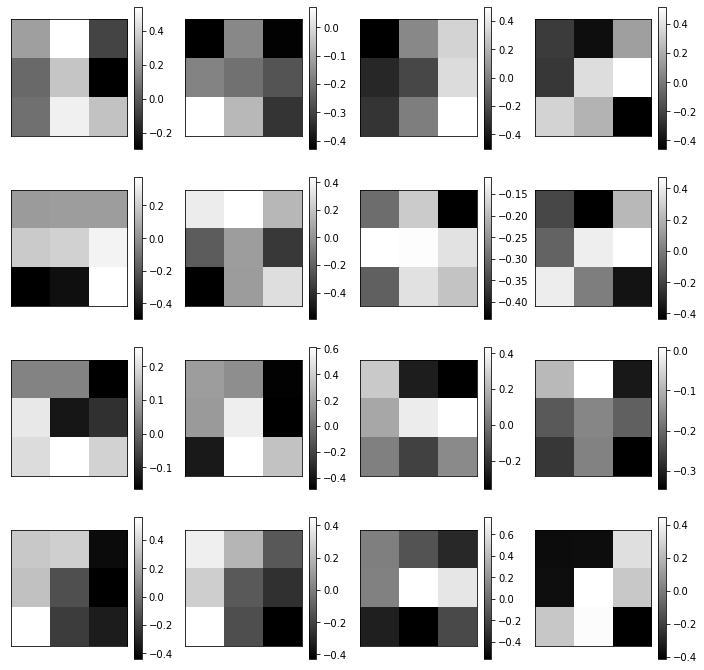

In [21]:
plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(W[:, :, 0, i], cmap=plt.cm.gray)
    plt.xticks([]); plt.yticks([])
    plt.colorbar()
plt.show()